### 1.Binary Morphology

#### Binary Filter: CROSS

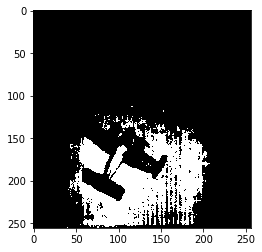

In [323]:
# Considering the airplane image from previous assignment
def Max_level(I):
    count = [0]*(256)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            count[I[i][j]] += 1
    max_freq = 0
    max_level = 0
    for i in range(256):
        if count[i] > max_freq:
            max_freq = count[i]
            max_level = i  
    return max_level
    

def UniModal_threshold(I,max_level):
    Img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i][j] < max_level:
                Img[i][j] = 0
            else:
                Img[i][j] = 1
     
    plt.imshow(Img,cmap = "gray")
    plt.show()
    return np.array(Img)

I = mpimg.imread(r'D:\IITH Courses\sem5\Image Processing\Assignment-2\5.1.11.tiff')
max_level = Max_level(I)
I_bin = UniModal_threshold(I,max_level)

In [332]:
# performing the operations with cross window
def CROSS_Dilate(k,i,j,I):
    val = I[i][j]
    for t in range(i+1,i+k+1):
        val = val or I[t][j]
    for t in range(i-1,i-k-1):
        val = val or I[t][j] 
    for t in range(j+1,j+k+1):
        val = val or I[i][t]
    for t in range(j-1,j-k-1):
        val = val or I[i][t] 
    return val

def CROSS_ERODE(k,i,j,I):
    val = I[i][j]
    for t in range(i+1,i+k+1):
        val = val and I[t][j]
    for t in range(i-1,i-k-1):
        val = val and I[t][j] 
    for t in range(j+1,j+k+1):
        val = val and I[i][t]
    for t in range(j-1,j-k-1):
        val = val and I[i][t] 
    return val  



def DILATE(I,B):
    filtered_img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    if B[0] == 'CROSS':
        k = B[1]//4  
        # to handle edge cases
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
                
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = CROSS_Dilate(k,i,j,I)
        return filtered_img
#         plt.imshow(filtered_img,cmap = "gray")
        
def ERODE(I,B):
    filtered_img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    if B[0] == 'CROSS':
        k = B[1]//4  
        # to handle edge cases
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
                
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = CROSS_ERODE(k,i,j,I)
        return filtered_img
#         plt.imshow(filtered_img,cmap = "gray")
        

#### 1.DILATE is the dual of ERODE

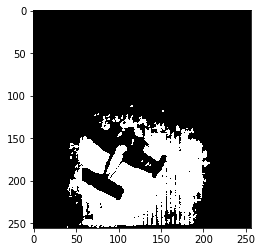

In [335]:
# 1.dilate(i,cross)
I1 = DILATE(I_bin,['CROSS',5])
plt.imshow(I1,cmap = "gray")
plt.show()

In [341]:
# 2

# (a)k = Not of I_bin
# (b)r = erode(k,cross)
# (c)not(r)

def not_I(I):
    J = [[0 for _ in range(len(I[0]))] for _ in range(len(I))]
    for i in range(len(I)):
        for j in range(len(I[0])):
            if I[i][j] == 0:
                J[i][j] = 1
            else:
                J[i][j] = 0
    J = np.array(J)
    return J

not_i = not_I(I_bin)
er = ERODE(not_i,['CROSS',5])
fin = not_I(er)

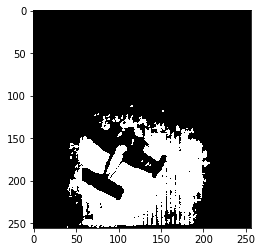

In [342]:
# we can observe that this image is getting matched with the above image plotted 
# Therefore, DILATE is the dual of ERODE with respect to complementation.
plt.imshow(fin,cmap = "gray")
plt.show()

#### 2.ERODE is the dual of DILATE

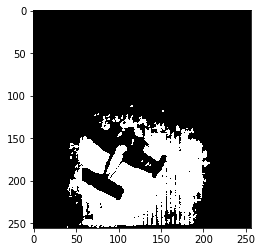

In [343]:
I2 = ERODE(I_bin,['CROSS',5])
plt.imshow(I1,cmap = "gray")
plt.show()

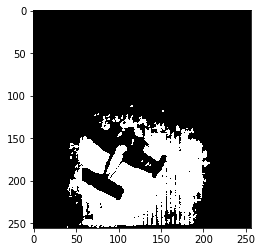

In [344]:
not_i_2 = not_I(I_bin)
dil = ERODE(not_i_2,['CROSS',5])
fin_2 = not_I(dil)
plt.imshow(fin_2,cmap = "gray")
plt.show()
# they both are same therefore erode is dual to dilate

In [346]:
def MEDIAN(I,B):
    filtered_img = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    if B[0] == 'CROSS':
        k = B[1]//4  
        # to handle edge cases
        for i in range(k):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]
        for i in range(I.shape[0]-k,I.shape[0]):
            for j in range(I.shape[1]):
                filtered_img[i][j] = I[i][j]    
        for i in range(I.shape[0]):
            for j in range(k):
                filtered_img[i][j] = I[i][j]  
        for i in range(I.shape[0]):
            for j in range(I.shape[1]-k,I.shape[1]):
                filtered_img[i][j] = I[i][j]
                
        for i in range(k,I.shape[0]-k):
            for j in range(k,I.shape[1]-k):
                filtered_img[i][j] = CROSS_MEDIAN(k,i,j,I)
    return filtered_img
#         plt.imshow(filtered_img,cmap = "gray") 
        
def CROSS_MEDIAN(k,i,j,I):
    count_0 = 0
    count_1 = 0
    if I[i][j] == 0:
        count_0 += 1
    else:
        count_1 += 1
        
    for t in range(i+1,i+k+1):
        if I[t][j] == 0:
            count_0 += 1
        else:
            count_1 += 1
    for t in range(i-1,i-k-1):
        if I[t][j] == 0:
            count_0 += 1
        else:
            count_1 += 1       
    for t in range(j+1,j+k+1):
        if I[i][t] == 0:
            count_0 += 1
        else:
            count_1 += 1
    for t in range(j-1,j-k-1):
        if I[i][t] == 0:
            count_0 += 1
        else:
            count_1 += 1
    if count_0 > count_1:
        return 0
    else:
        return 1

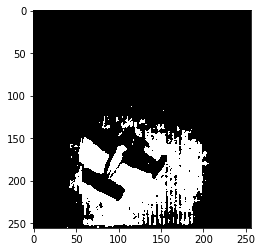

In [348]:
I3 = MEDIAN(I_bin,['CROSS',5])
plt.imshow(I3,cmap = "gray")
plt.show()

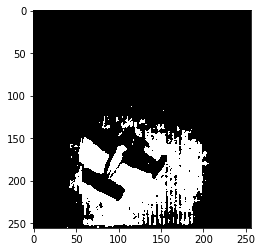

In [349]:
new_not_i = not_I(I_bin)
med = MEDIAN(new_not_i,['CROSS',5])
final_img = not_I(med)
plt.imshow(final_img,cmap = "gray")
plt.show()
# we can observe that the images are same,therefore MEDIAN is its own dual with respect to complementation.

### 2. Gray Scale Operations    
                                  
#### 1. Linear Point Operations


In [327]:
# imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [328]:
# load the image
# https://apod.nasa.gov/apod/ap200921.html 
I = mpimg.imread(r'D:\IITH Courses\sem5\Image Processing\Assignment-2\sunset.jpg')
I.shape

(761, 960, 3)

In [329]:
# from the class , we can convert rgb image to gray scale as follows
def rgbTogray(I):
    I_gray = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            temp = I[i][j][0]+I[i][j][1]+I[i][j][2]
            temp = int(temp/3)
            I_gray[i][j] = temp
    return np.array(I_gray)

In [330]:
I_gray = rgbTogray(I)
# plt.imshow(I_gray,cmap=plt.get_cmap('gray'))
# plt.show()

C:\Users\abcd\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


__(a) J = P.I__

In [239]:
def Plot_histogram(I,title="Histogram"):
    I_1D=[]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            I_1D.append(I[i][j])
    plt.hist(I_1D, color = 'blue', edgecolor = 'black',bins = int(1800))
    plt.xlim(0,255)
    plt.title(title)
    
def Point_OP(I,P,L):
    J = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    J = np.array(J)
    for i in range(0,I.shape[0]):
        for j in range(0,I.shape[1]):
            I[i][j] = int(I[i][j]) # values should be int
            temp = (P*I[i][j])+L 
            if temp > 255:
                temp = 255
            if temp < 0:
                temp = 0
            J[i][j] = temp
    plt.subplot(211)
    Plot_histogram(J,"Histogram after Point Operation")
    plt.subplot(212)
    Plot_histogram(I,"Histogram before point operation")


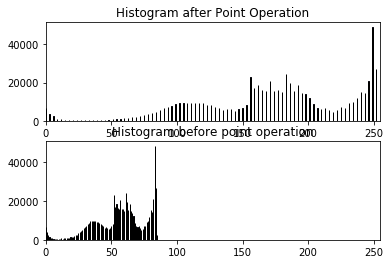

In [240]:
# for (a) L = 0
Point_OP(I_gray,3,0)

__(b) J = I + L__ 

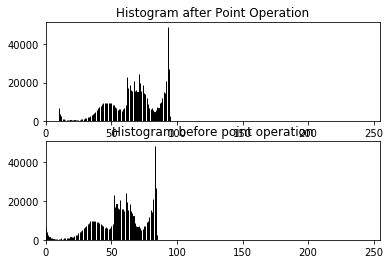

In [241]:
# for (b) , P = 1 
Point_OP(I_gray,1,10)

#### 2. Full scale contrast stretch (FSCS).

In [318]:
def Max_Pixel_value(I):
    max_pixel = I[0][0]
    for i in range(len(I)):
        for j in range(len(I[0])):
            if I[i][j] > max_pixel:
                max_pixel = I[i][j]
    return max_pixel


def Min_Pixel_value(I):
    min_pixel = I[0][0]
    for i in range(len(I)):
        for j in range(len(I[0])):
            if I[i][j] < min_pixel:
                min_pixel = I[i][j]
    return min_pixel  

def Point_OP_val(I,P,L):
    J = [[0 for _ in range(len(I[0]))] for _ in range(len(I))]
    J = np.array(J)
    for i in range(0,len(I)):
        for j in range(0,len(I[0])):
            # values should be int
            temp = int((P*I[i][j])+L) 
            if temp > 255:
                temp = 255
            if temp < 0:
                temp = 0
            J[i][j] = temp
    J = np.array(J)
    return J

In [319]:
def FSCS(I):
    B = int(Max_Pixel_value(I))
    A = int(Min_Pixel_value(I))
    P = 255/(B-A)
    L = (-255*A)/(B-A)
    J = Point_OP_val(I,P,L)
    plt.subplot(211)
    Plot_histogram(J,"Histogram after FSCS")
    plt.subplot(212)
    Plot_histogram(I,"Histogram before FSCS")


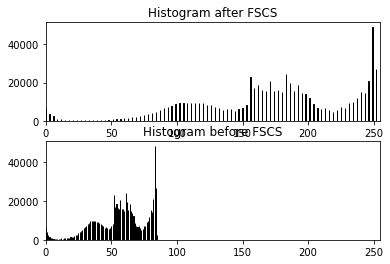

In [282]:
FSCS(I_gray)

#### 3.Log magnitude compression (always followed by FSCS).

In [320]:
def FSCS_val(I):
    B = Max_Pixel_value(I)
    A = Min_Pixel_value(I)
    P = 255/(B-A)
    L = (-255/(B-A))*A 
    J = Point_OP_val(I,P,L)
    return J


def Log_Mag_Compress(I):
    J = [[0 for _ in range(I.shape[1])] for _ in range(I.shape[0])]
    J = np.array(J)
    for i in range(0,I.shape[0]):
        for j in range(0,I.shape[1]):
            I[i][j] = int(I[i][j]) # values should be int
            temp = np.log(1+I[i][j])
            if temp > 255:
                temp = 255
            if temp < 0:
                temp = 0
            J[i][j] = temp
    final = FSCS_val(J)
    plt.subplot(211)
    Plot_histogram(J,"Histogram after Log Compression")
    plt.subplot(212)
    Plot_histogram(I,"Histogram before Log Compression")
    

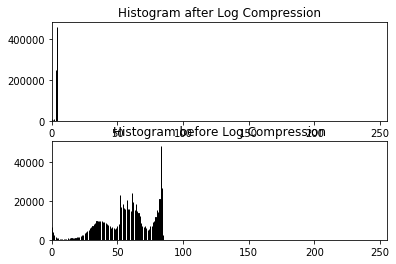

In [284]:
Log_Mag_Compress(I_gray)

#### 4.Histogram flattening

In [321]:
def PDF(I):
    # there are 256 diff values possible 
    pdf = [0]*256
    count_pix = [0]*256
    L = I.shape[0]*I.shape[1]
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            count_pix[I[i][j]] += 1
    for k in range(len(count_pix)):
        pdf[k] = count_pix[k]/(I.shape[0]*I.shape[1])
    return pdf

def CDF(pdf):
    cdf = [0]*256
    s = 0
    for i in range(0,256):
        s += pdf[i]
        cdf[i] = s
    return cdf


def Hist_flatten(I):
    pdf = PDF(I)
    cdf = CDF(pdf)
    J = [[0 for _ in range(len(I[0]))] for _ in range(len(I))]
    for i in range(len(I)):
        for j in range(len(I[i])):
            J[i][j] = cdf[I[i][j]]
    f = FSCS_val(J)
    plt.subplot(211)
    Plot_histogram(f,"after hist flatten")
    plt.subplot(212)
    Plot_histogram(I,"Histogram before Hist flatten")    
    
# by applying these operations these images get distorted

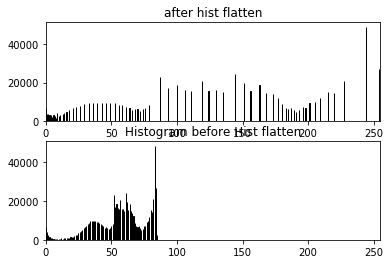

In [322]:
Hist_flatten(I_gray)

## 3 Zooming

#### 1. Nearest neighbor.

In [400]:
# https://apod.nasa.gov/apod/ap200921.html
I = mpimg.imread(r'D:\IITH Courses\sem5\Image Processing\Assignment-2\sunset.jpg')

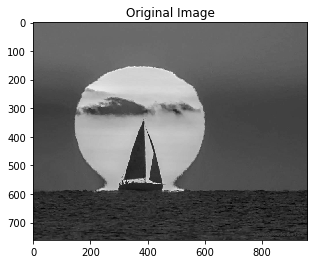

In [401]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.333 * r + 0.333 * g + 0.333 * b
    return gray

Img = rgb2gray(I)
for i in range(len(Img)):
    for j in range(len(Img[0])):
        Img[i][j] = int(Img[i][j])
plt.imshow(Img,cmap = "gray")
plt.title('Original Image')
plt.show()

In [406]:
import random
def Zoom_NN(I):
    size = [int(1.5*(I.shape[0])),int(1.5*(I.shape[1]))]
    dummy = np.zeros(size,dtype = np.int32)
    for i in range(size[0]):
        for j in range(size[1]):
            dummy[i][j] = I[int(i/1.5)][int(j/1.5)]
    for i in range(0,size[0]):
        for j in range(0,size[1],3):
            dummy[i][j] = -1
            
    for i in range(0,size[0],3):
        for j in range(0,size[1]):
            dummy[i][j] = -1
            
    for i in range(size[0]):
        for j in range(size[1]):
            poss = []
            if dummy[i][j] == -1:
                if (i >= 1):
                    if dummy[i-1][j] != -1:
                        poss.append(dummy[i-1][j])
                if (j >= 1):
                    if dummy[i][j-1] != -1:
                        poss.append(dummy[i][j-1])
                if (i <= size[0]-2):
                    if dummy[i+1][j] != -1:
                        poss.append(dummy[i+1][j])
                if (j <= size[1]-2):
                    if dummy[i][j+1] != -1:
                        poss.append(dummy[i][j+1])
                if (i>=1) and (j>=1):
                    if dummy[i-1][j-1] != -1:
                        poss.append(dummy[i-1][j-1])
                if (i <= size[0]-2) and (j <= size[1]-2):
                    if dummy[i+1][j+1] != -1:
                        poss.append(dummy[i+1][j+1])
                    
                if poss != None:
                    dummy[i][j] = random.choice(poss)

    return dummy

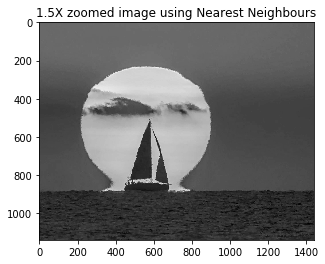

In [407]:
fin = Zoom_NN(Img)
plt.imshow(fin,cmap = "gray")
plt.title('1.5X zoomed image using Nearest Neighbours')
plt.show()